11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28, 1)
Testing data shape: (10000, 28, 28, 1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 51s 29ms/step - accuracy: 0.9017 - loss: 0.3244 - val_accuracy: 0.9872 - val_loss: 0.0467
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9860 - loss: 0.0463 - val_accuracy: 0.9873 - val_loss: 0.0475
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 47s 28ms/step - accuracy: 0.9906 - loss: 0.0289 - val_accuracy: 0.9912 - val_loss: 0.0378
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9935 - loss: 0.0206 - val_accuracy: 0.9880 - val_loss: 0.0447
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 49s 29ms/step - accuracy: 0.9954 - loss: 0.0136 - val_accuracy: 0.9930 - val_loss: 0.0303
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 80s 28ms/step - accuracy: 0.9958 - loss: 0.0121 - val_accuracy: 0.9918 - val_loss: 0.0329
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 28ms/step - accuracy: 0.9972 - loss: 0.0086 - val_accuracy: 0.9907 - val_loss: 0.0406
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 27ms/step - accuracy: 0.9980 -

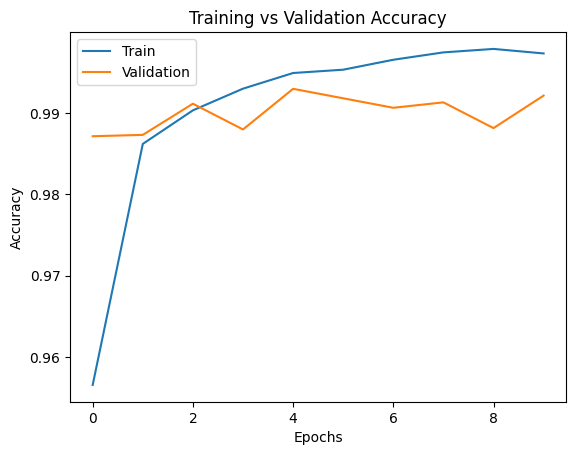

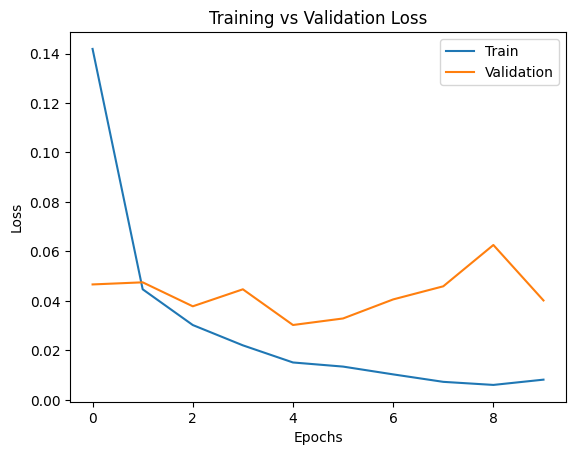

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape for CNN
# (28,28) → (28,28,1)
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test  = x_test.reshape(-1, 28, 28, 1) / 255.0

print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

# Build CNN Model
model = Sequential([

    # 1st Convolution Layer
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),

    # 2nd Convolution Layer
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    # Convert 2D → 1D
    Flatten(),

    # Fully Connected Layer
    Dense(128, activation='relu'),

    # Output Layer (0-9 digits)
    Dense(10, activation='softmax')
])

# Compile Model
model.compile(
    optimizer=Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train Model
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1
)

# Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)

# Plot Accuracy
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Train', 'Validation'])
plt.show()

# Plot Loss
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Train', 'Validation'])
plt.show()